# Regresión Logistica

Apliquemos una regresión logística a un conjunto de datos conocido

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score)

# Configurar estilo de gráficos
%matplotlib inline
sns.set(style='whitegrid')

In [174]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


In [176]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [178]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Ataquemos el problema como si se tratara de una clasificación binaria

In [181]:
# Crear variable binaria: 1 si es Iris Setosa, 0 si no
df['is_setosa'] = np.where(df['species'] == 2, 1, 0)

In [183]:
X = df[iris.feature_names]  # Variables independientes
y = df['is_setosa']         # Variable dependiente

In [185]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y)


In [187]:
# Instanciar el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=200)

In [189]:
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

El método fit resuelve las ecuaciones normales de máxima verosimilitud utilizando métodos numéricos.

In [192]:
# Obtener el intercepto y los coeficientes
beta_0 = model.intercept_[0]
beta = model.coef_[0]

# Mostrar los coeficientes
coefficients = pd.DataFrame({
    'Variable': ['Intercepto'] + iris.feature_names,
    'Coeficiente': [beta_0] + list(beta)
})
print(coefficients)


            Variable  Coeficiente
0         Intercepto   -13.675800
1  sepal length (cm)    -0.378489
2   sepal width (cm)    -0.566892
3  petal length (cm)     2.864257
4   petal width (cm)     2.179992


Los coeficientes 𝛽 representan el cambio en 𝑌 por unidad de cambio en 𝑋

Un coeficiente positivo indica que al aumentar 𝑋, aumenta la probabilidad de que 𝑌 sea la clase deseada

Un coeficiente negativo indica lo contrario.

Por ejemplo:

sepal width (cm) tiene un coeficiente positivo, lo que sugiere que a mayor ancho de sépalo, mayor probabilidad de ser Iris Setosa.

petal length (cm) y petal width (cm) tienen coeficientes negativos "grandes", indicando que a mayor longitud y ancho de pétalo, menor probabilidad de ser Iris Setosa.

In [195]:
# Probabilidades predichas para el conjunto de prueba
y_pred_proba = model.predict_proba(X_test)[:, 1]

**predict_proba** utiliza la función sigmoide para calcular $P(Y=1∣X)$:

$P(Y=1∣X) = \frac{1}{ 1 + \exp^{(-(\beta_{0} + \beta_{1}X_{1} + ...))}} $

In [198]:
# Predicciones de clase basadas en un umbral de 0.5
y_pred = model.predict(X_test)

**predict** compara las probabilidades predichas con un umbral (0.5 por defecto) para asignar una clase.

In [201]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0])

# Evauación

In [204]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Precisión (Accuracy): Proporción de predicciones correctas sobre el total de predicciones.

Precision (Precisión): Proporción de verdaderos positivos sobre todos los positivos predichos.

Recall (Sensibilidad): Proporción de verdaderos positivos sobre todos los positivos reales.

F1-Score: Media armónica de precision y recall.

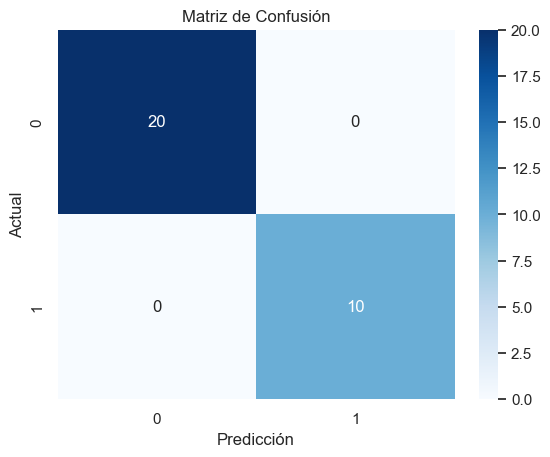

In [207]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()
